In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import cv2

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from keras.models import Model, Sequential
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Input, LeakyReLU, BatchNormalization, UpSampling2D, MaxPooling2D
from keras.layers import concatenate
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.metrics import Accuracy


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

In [16]:
images_gray = np.load('/Users/gunik/Downloads/grayscale dataset//l/gray_scale.npy')
images_lab = np.load('/Users/gunik/Downloads/grayscale dataset/ab/ab/ab1.npy')
images_gray.shape

(25000, 224, 224)

In [17]:
def pipe_line_img(gray_scale_imgs, batch_size = 100, preprocess_f = preprocess_input):
    imgs = np.zeros((batch_size, 224, 224, 3))
    for i in range(0, 3):
        imgs[:batch_size, :, :,i] = gray_scale_imgs[:batch_size]
    return preprocess_f(imgs)

imgs_for_input = pipe_line_img(images_gray, batch_size = 600)

In [18]:
test_input = imgs_for_input[500:600, :, :, :]
test_input.shape

(100, 224, 224, 3)

In [19]:
imgs_for_input = imgs_for_input[0:500, :, :, :]
imgs_for_input.shape

(500, 224, 224, 3)

In [20]:
#define the function
def get_rbg_from_lab(gray_imgs, ab_imgs, n = 10):
    
    #create an empty array to store images
    imgs = np.zeros((n, 224, 224, 3))
    
    imgs[:, :, :, 0] = gray_imgs[0:n:]
    imgs[:, :, :, 1:] = ab_imgs[0:n:]
    
    #convert all the images to type unit8
    imgs = imgs.astype("uint8")
    
    #create a new empty array
    imgs_ = []
    
    for i in range(0, n):
        imgs_.append(cv2.cvtColor(imgs[i], cv2.COLOR_LAB2RGB))
    #convert the image matrix into a numpy array
    imgs_ = np.array(imgs_)
   
    return imgs_
    
#preprocess the input to 
imgs_for_output = preprocess_input(get_rbg_from_lab(gray_imgs = images_gray, ab_imgs = images_lab, n = 600))

print(imgs_for_input.shape)
imgs_for_output.shape

(500, 224, 224, 3)


(600, 224, 224, 3)

In [21]:
test_output = imgs_for_output[500:600, :, :, :]
test_output.shape

(100, 224, 224, 3)

In [22]:
imgs_for_output = imgs_for_output[0:500, :, :, :]
imgs_for_output.shape

(500, 224, 224, 3)

In [23]:
#Model 1
model_1 = Sequential()
model_1.add(Conv2D(strides = 1, kernel_size = 5, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_1.add(Conv2D(strides = 1, kernel_size = 5, filters = 24, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_1.add(Conv2DTranspose(strides = 1, kernel_size = 5, filters = 24, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_1.add(Conv2DTranspose(strides = 1, kernel_size = 5, filters = 3, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
#Compile the model
model_1.compile(optimizer = Adam(epsilon = 1e-8), loss=mean_squared_error, metrics=[Accuracy()])

In [24]:
#Model 2
model_2 = Sequential()
model_2.add(Conv2D(strides = 2, kernel_size = 5, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "same", activation = tf.nn.relu))
model_2.add(Conv2D(strides = 2, kernel_size = 5, filters = 24, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "same", activation = tf.nn.relu))
model_2.add(MaxPooling2D(2))
model_2.add(Conv2D(strides = 2, kernel_size = 5, filters = 24, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "same", activation = tf.nn.relu))
model_2.add(MaxPooling2D(2))
model_2.add(BatchNormalization())
model_2.add(UpSampling2D(2))
model_2.add(Conv2DTranspose(strides = 2, kernel_size = 5, filters = 24, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "same", activation = tf.nn.relu))
model_2.add(UpSampling2D(2))
model_2.add(Conv2DTranspose(strides = 2, kernel_size = 5, filters = 24, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "same", activation = tf.nn.relu))
model_2.add(Conv2DTranspose(strides = 2, kernel_size = 5, filters = 3, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "same", activation = tf.nn.relu))
#Compile the model
model_2.compile(optimizer = Adam(epsilon = 1e-8), loss=mean_squared_error, metrics=[Accuracy()])

In [25]:
#Model 3
model_3 = Sequential()
model_3.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_3.add(Conv2D(strides = 1, kernel_size = 3, filters = 24, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_3.add(BatchNormalization())
model_3.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 48, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_3.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 3, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))

#Compile the model
model_3.compile(optimizer = Adam(epsilon = 1e-8), loss=mean_squared_error, metrics=[Accuracy()])

In [26]:
models = [model_1, model_2, model_3]

In [27]:
#fit the model using input and output images
n = 3
history = [None] * n
for i in range(0,n):
    history[i] = models[i].fit(imgs_for_input, imgs_for_output, epochs = 50, batch_size = 16, verbose = 0, validation_split = 0.2)
    models[i].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 220, 220, 12)      912       
                                                                 
 conv2d_3 (Conv2D)           (None, 216, 216, 24)      7224      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 220, 220, 24)      14424     
 Transpose)                                                      
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 224, 224, 3)       1803      
 Transpose)                                                      
                                                                 
Total params: 24363 (95.17 KB)
Trainable params: 24363 (95.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential

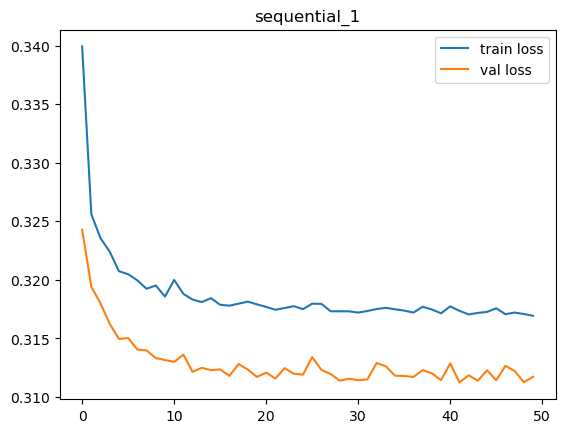

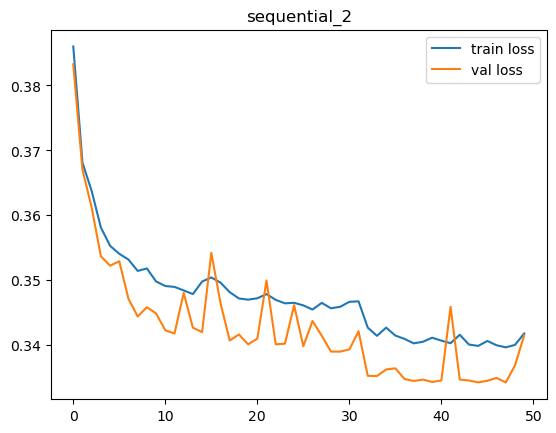

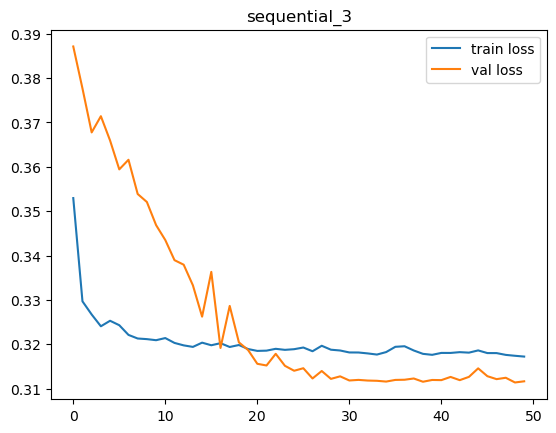

<Figure size 640x480 with 0 Axes>

In [28]:
for i in range(0,n):
    plt.plot(history[i].history['loss'], label='train loss')
    plt.plot(history[i].history['val_loss'], label='val loss')
    plt.title(models[i].name)
    plt.legend()
    plt.show()
    plt.savefig('LossVal_loss')

In [29]:
predictions = [None] * n
for i  in range (0, n):
    predictions[i] = models[i].predict(imgs_for_input)

16/16 [==============================] - 8s 462ms/step


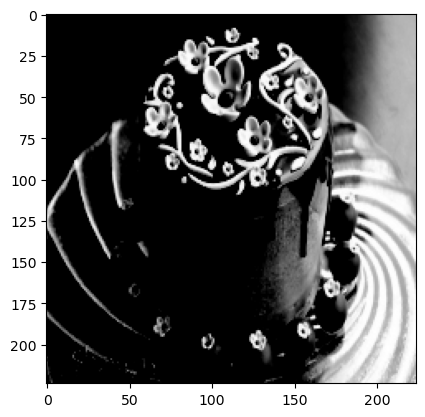

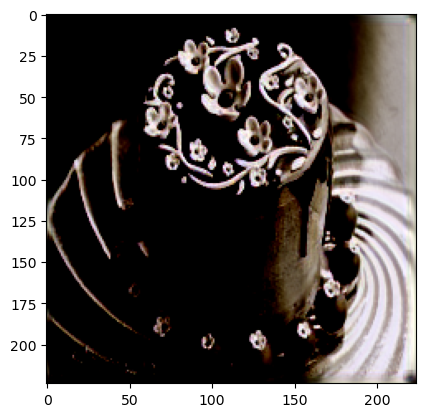

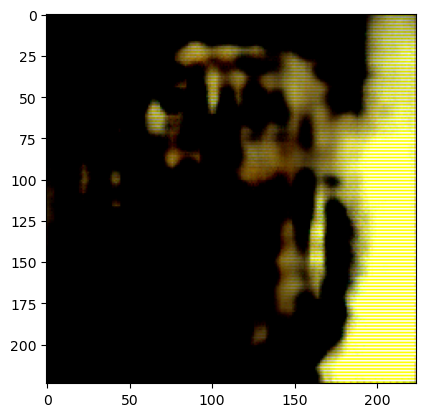

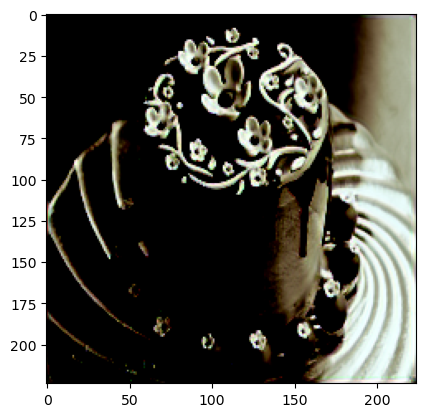

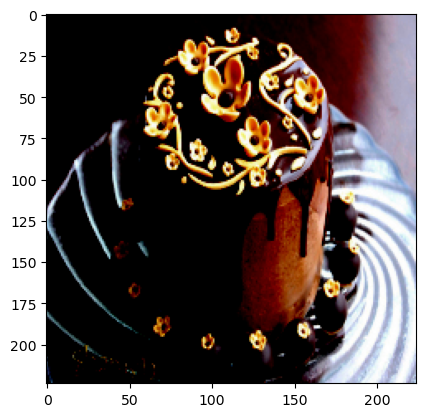

In [30]:
plt.imshow(imgs_for_input[2])
plt.show()
for j in range (0,n):
    plt.imshow(predictions[j][2])
    plt.show()
plt.imshow(imgs_for_output[2])

In [31]:
for i in range(0,3):
    scor = models[i].evaluate(np.array(test_input),  np.array(test_output), verbose=2)
    print("-------" + models[i].name + "-------")
    print('test los {:.4f}'.format(scor[0]))
    print('test acc {:.4f}'.format(scor[1]))



4/4 - 2s - loss: 0.3180 - accuracy: 0.0000e+00 - 2s/epoch - 607ms/step
-------sequential_1-------
test los 0.3180
test acc 0.0000
4/4 - 0s - loss: 0.3554 - accuracy: 0.0000e+00 - 333ms/epoch - 83ms/step
-------sequential_2-------
test los 0.3554
test acc 0.0000
4/4 - 2s - loss: 0.3180 - accuracy: 1.3287e-07 - 2s/epoch - 521ms/step
-------sequential_3-------
test los 0.3180
test acc 0.0000


In [ ]:
# HEIGHT=224
# WIDTH = 224
# Input_Sample = Input(shape=(HEIGHT, WIDTH,1))
# Output_ = InstantiateModel(Input_Sample)

In [ ]:
# def InstantiateModel(in_):
#     model_ = Conv2D(16,(3,3),padding='same',strides=1)(in_)
#     model_ = LeakyReLU()(model_)
#     #model_ = Conv2D(64,(3,3), activation='relu',strides=1)(model_)
#     model_ = Conv2D(32,(3,3),padding='same',strides=1)(model_)
#     model_ = LeakyReLU()(model_)
#     model_ = BatchNormalization()(model_)
#     model_ = MaxPooling2D(pool_size=(2,2),padding='same')(model_)
    
#     model_ = Conv2D(64,(3,3),padding='same',strides=1)(model_)
#     model_ = LeakyReLU()(model_)
#     model_ = BatchNormalization()(model_)
#     model_ = MaxPooling2D(pool_size=(2,2),padding='same')(model_)
    
#     model_ = Conv2D(128,(3,3),padding='same',strides=1)(model_)
#     model_ = LeakyReLU()(model_)
#     model_ = BatchNormalization()(model_)
    
#     model_ = Conv2D(256,(3,3),padding='same',strides=1)(model_)
#     model_ = LeakyReLU()(model_)
#     model_ = BatchNormalization()(model_)
    
#     model_ = UpSampling2D((2, 2))(model_)
#     model_ = Conv2D(128,(3,3),padding='same',strides=1)(model_)
#     model_ = LeakyReLU()(model_)
#     model_ = BatchNormalization()(model_)
    
#     model_ = UpSampling2D((2, 2))(model_)
#     model_ = Conv2D(64,(3,3), padding='same',strides=1)(model_)
#     model_ = LeakyReLU()(model_)
#     #model_ = BatchNormalization()(model_)
    
#     concat_ = concatenate([model_, in_]) 
    
#     model_ = Conv2D(64,(3,3), padding='same',strides=1)(concat_)
#     model_ = LeakyReLU()(model_)
#     model_ = BatchNormalization()(model_)
    
#     model_ = Conv2D(32,(3,3),padding='same',strides=1)(model_)
#     model_ = LeakyReLU()(model_)
#     #model_ = BatchNormalization()(model_)
    
#     model_ = Conv2D(2,(3,3), activation='tanh',padding='same',strides=1)(model_)

#     return model_
